## **Import Recipe Data from Kaggle API** ##

In [ ]:
import os
import kaggle
import dask.dataframe as dd
from dask.distributed import Client
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set token directory
kaggle_dir = '~/.kaggle/'
os.environ['KAGGLE_CONFIG_DIR'] = kaggle_dir

# download datasets using api
kaggle.api.authenticate()
# kaggle.api.dataset_download_files('irkaal/foodcom-recipes-and-reviews',
                                # path='kaggle_data',
                                # unzip=True)

## **Activate Dask** ##

In [ ]:
client = Client()
client

/Users/jdogtherock/anaconda3/envs/AI/lib/python3.7/site-packages/distributed/node.py:161: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64183 instead
  f"Port {expected} is already in use.\n"


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:64183/status,
Dashboard: http://127.0.0.1:64183/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64184,Workers: 4
Dashboard: http://127.0.0.1:64183/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:64197,Total threads: 2
Dashboard: http://127.0.0.1:64199/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:64189,


## **Building EDA Pipeline** ##

In [ ]:
# EDA Pipeline
class EDA():
    def __init__(self, data):
        self.data = data
        self.num_samples = len(data)
        self.num_features = len(data.columns)
        self.data_types = data.dtypes
        self.percent_missing = data.isna().mean()
        self.cat_cols = data.select_dtypes('int').columns

    def EDA_report(self):
        print('DATASET EDA REPORT:\n')
        print(f'Samples: {self.num_samples}\nFeatures: {self.num_features}\n\nDatatypes:\n{self.data_types}\n\n% Missing Per Column: {self.percent_missing}\n')

        print('\nSummary Stats Per Column:\n')
        print(self.data.describe())
        print()
        print(f'\nNumber of columns per datatype:\n')
        for datatype in self.data_types.unique().tolist():
            name = datatype
            count = self.data.select_dtypes(name).shape[1]
            print(f'{name}:{count}')
        print()
    
    def heatmap(self):
        corr = self.data.corr().compute()
        sns.heatmap(corr, cmap='coolwarm', annot=False)
        plt.show()

    def boxplot(self):
        import hvplot.dask
        box = self.data.hvplot.box()
        box


## **Recipes EDA Report** ##

DATASET EDA REPORT:

Samples: 522517
Features: 28

Datatypes:
RecipeId                                  float64
Name                                       object
AuthorId                                    int32
AuthorName                                 object
CookTime                                   object
PrepTime                                   object
TotalTime                                  object
DatePublished                 datetime64[ns, UTC]
Description                                object
Images                                     object
RecipeCategory                             object
Keywords                                   object
RecipeIngredientQuantities                 object
RecipeIngredientParts                      object
AggregatedRating                          float64
ReviewCount                                 int32
Calories                                  float64
FatContent                                float64
SaturatedFatContent                   

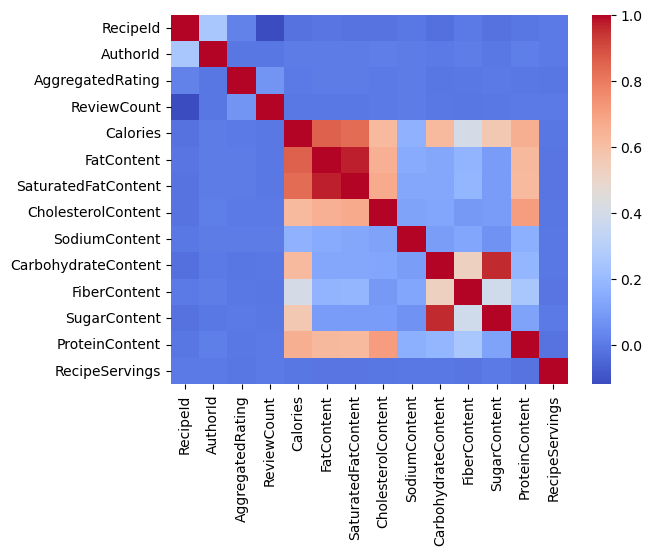

Launching server at http://localhost:64270


In [ ]:
recipes = dd.read_parquet('kaggle_data/recipes.parquet')
eda_pipe = EDA(recipes)
eda_pipe.EDA_report()
eda_pipe.heatmap()
eda_pipe.boxplot()

## **Data Cleaning Based on EDA** ##

In [ ]:
# For columns that are missing aggregatated rating, get that data from the reviews.parquet
# Get all the reviews for that specific recipeID
# Get all the ratings, sum them up and divide by the review count
# Then fill that in for its missing aggregated rating value

# Then, remove all samples with servings & yield missing

## **Vectorizing the Features** ##

## **Combining Vectorized Features** ##

## **Storing Vectors in a VectorDB** ##

## **Testing** ##